In [1]:
import pandas as pd
# import io
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import files
import seaborn as sns
from scipy import stats

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [2]:
# uploaded = files.upload()

In [3]:
df = pd.read_csv("new_LadyAgri.csv")
df_raw = pd.read_excel("LadyAgri Database_Raw - CIV.xlsx")
print(df.shape)
print(df.describe())


(392, 82)
                 B3          B4   B6_8_TEXT            D9         D14  \
count    392.000000  392.000000  392.000000  3.920000e+02  294.000000   
mean     162.691327    1.487245    3.785714  4.582398e+05    6.534014   
std     1109.006274    5.146433    6.111496  4.038242e+06    2.199255   
min        0.000000    0.000000    0.000000  0.000000e+00    0.000000   
25%        0.000000    0.000000    0.000000  0.000000e+00    5.000000   
50%       13.000000    0.000000    0.000000  0.000000e+00    7.000000   
75%       61.000000    0.000000    6.000000  0.000000e+00    8.000000   
max    21200.000000   50.000000   36.000000  6.000000e+07   10.000000   

               E4  Agri - Transport (financing for vehicle)   Insurance  \
count  289.000000                                392.000000  392.000000   
mean     7.463668                                  0.364796    0.114796   
std      1.789115                                  0.481988    0.319183   
min      0.000000               

In [4]:
df_cols = df.columns.tolist()
df_raw_cols =  df_raw.columns.tolist()
cols_in_text = {}
for i in df_cols:
    if i in df_raw_cols:
        value = df_raw[i].iloc[0]  # Get the value from the first row of df_raw
        cols_in_text[i] = value
cols_in_text

{'A4': 'Marital status',
 'A5': 'Highest level of education',
 'A9': 'Country - Selected Choice',
 'B2': 'What type of organisation is it ?',
 'B3': 'Number of members in your interprofession / cooperative / GIE :',
 'B4': 'Number of employees in your company :',
 'B6': 'How long ago was it created ? - Selected Choice',
 'B6_8_TEXT': 'How long ago was it created ? - More than 3, specify - Text',
 'B8': 'Describe your company/cooperative  in a few words (business model, product, ...)',
 'B9': 'In which of these urban zones are you selling ? - Selected Choice',
 'B10': 'Do you sell online ? (Facebook, Website, …)',
 'B11': 'Are your products certified ?\nIf yes, specify the label - Selected Choice',
 'B12': 'Where are your clients ?',
 'B13': 'What is the business\' income/turnover per year in CFA? (Specify the exact number in the box - write "12" if you earn 12 million or 0.8 if you earn 800 000 FCFA) - Selected Choice',
 'B14': 'What is your core business ? (Main crop/ Main product) - 

In [5]:
df_raw.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,F2,F3,F4,F5,F6,F6_1_TEXT,F7,F7_1_TEXT,F8,F8_1_TEXT
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,What is the percentage of women in supervisory...,What is the percentage of women employees/memb...,Do your employees receive health benefits and ...,What is the percentage of women suppliers?,Does the business specifically target/benefit ...,Does the business specifically target/benefit ...,Does the business have a positive impact on th...,Does the business have a positive impact on th...,Is your production model sustainable ? Explain...,Is your production model sustainable ? Explain...
1,2022-01-11 03:10:29,2022-01-11 03:24:05,IP Address,NaN,100,815,True,2022-01-11 03:24:05.468000,R_1IL8qtNWhdv2yGf,NaN,...,51-60%,51-60%,No,NaN,"Yes, explain",Ce sont les femmes qui en majorité font la tra...,NaN,NaN,NaN,NaN
2,2022-01-11 02:23:56,2022-01-11 03:34:51,IP Address,NaN,100,4255,True,2022-01-11 03:34:52.094000,R_2CHdOa6xzHbKAIJ,NaN,...,10-20%,10-20%,No,10-20%,"Yes, explain",Le commerce de l'attiéké et du placali est fai...,"Yes, explain",Notre activité comble le manque de produits su...,"Yes, explain",Nous avons 10 hectares de terres pour produire...
3,2022-01-11 05:47:17,2022-01-11 06:02:18,IP Address,NaN,100,901,True,2022-01-11 06:02:19.099000,R_2YYcsoxWKmBVxLC,NaN,...,71-80%,51-60%,Yes,31-40%,No,NaN,"Yes, explain","Elle achète au prix juste , accompagne certain...","Yes, explain",Nous reutilisons les déchets issus de notre ac...
4,2022-01-11 03:08:41,2022-01-11 08:02:15,IP Address,NaN,100,17613,True,2022-01-11 08:02:17.292000,R_WBd7Iugd4slk2A1,NaN,...,More than 90%,Less than 10%,No,More than 90%,"Yes, explain",Les femmes unissent leur force pour l'avanceme...,"Yes, explain",Elle accorde de l'attiéké à la cantine scolaire,"Yes, explain",L'entreprise compte diversifier ses marchés


In [6]:
for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')


In [33]:
for col in df.columns:
    if set(df[col]) == {0, 1} or set(df[col]) == {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}:
        df[col] = df[col].astype('category')

In [15]:
df.isna().sum()

A4                                 5
A5                                 3
A9                                 5
B2                                14
B3                                 0
                                ... 
Processing                         0
Agri-Services - Inputs supply      0
D3_Combined                        0
B13_Combined                       0
Age                              151
Length: 82, dtype: int64

## DISTRIBUTION and OUTLIERS 

Single      0.485788
Married     0.454780
Widowed     0.043928
Divorced    0.015504
Name: A4, dtype: float64


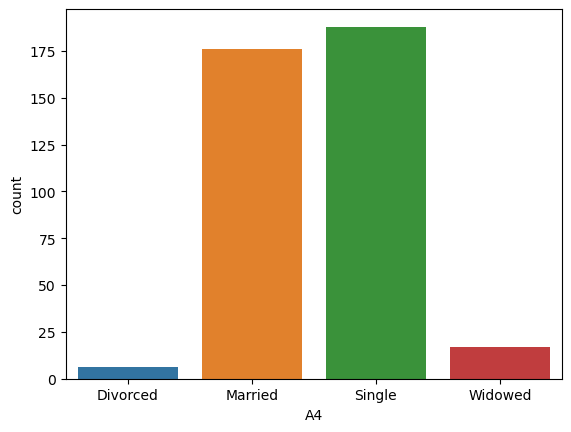

University                0.403599
High School               0.282776
Primary                   0.123393
Professional training     0.115681
None                      0.064267
Middle School             0.010283
Name: A5, dtype: float64


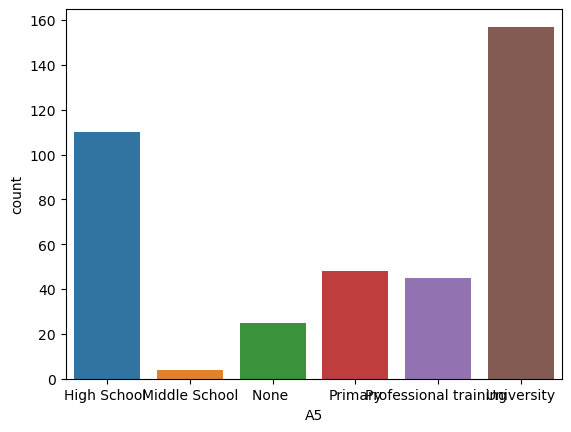

Côte d'Ivoire     0.984496
Other, specify    0.015504
Name: A9, dtype: float64


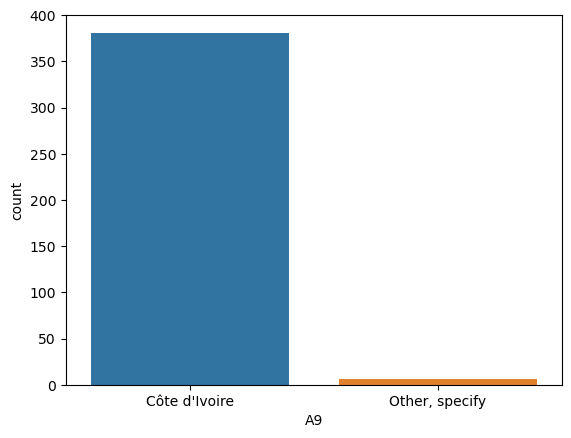

Cooperative                0.465608
Women’s association        0.187831
Other                      0.129630
Family-Led SME             0.095238
Women-Led SME              0.052910
Economic Interest Group    0.031746
Interprofession            0.023810
Exporters                  0.013228
Name: B2, dtype: float64


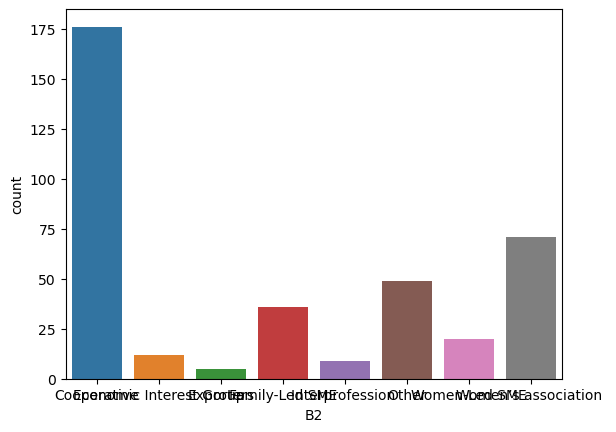

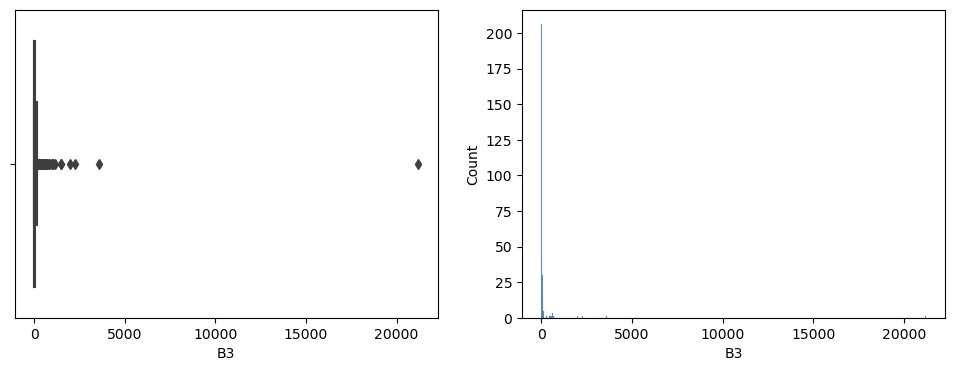

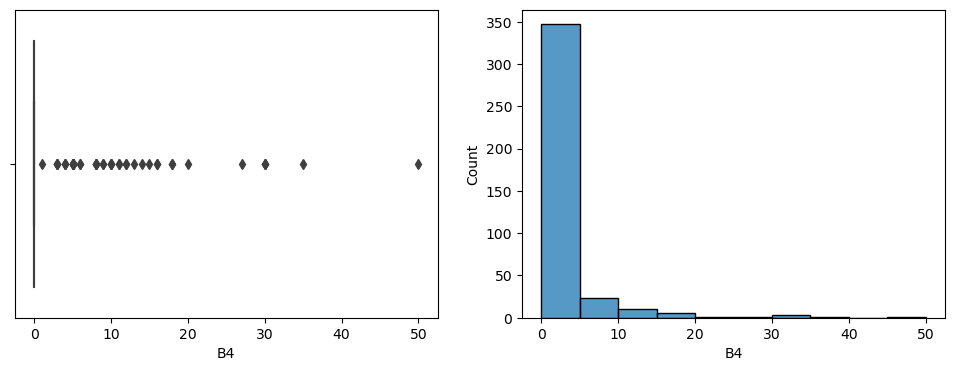

More than 3, specify            0.611801
Between 1 and 3 years           0.214286
Between 6 months and a year     0.111801
Between 3 and 6 months          0.034161
Less than 3 months              0.027950
Name: B6, dtype: float64


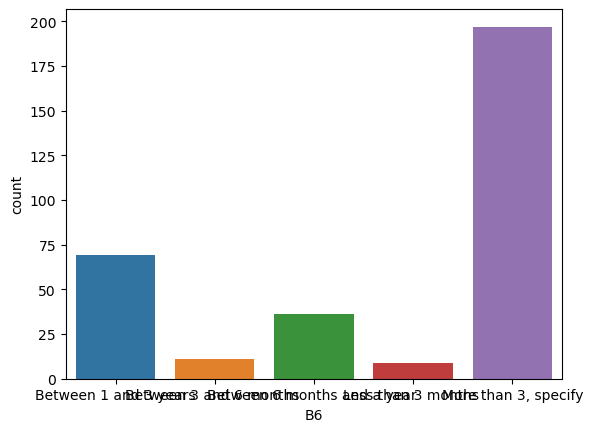

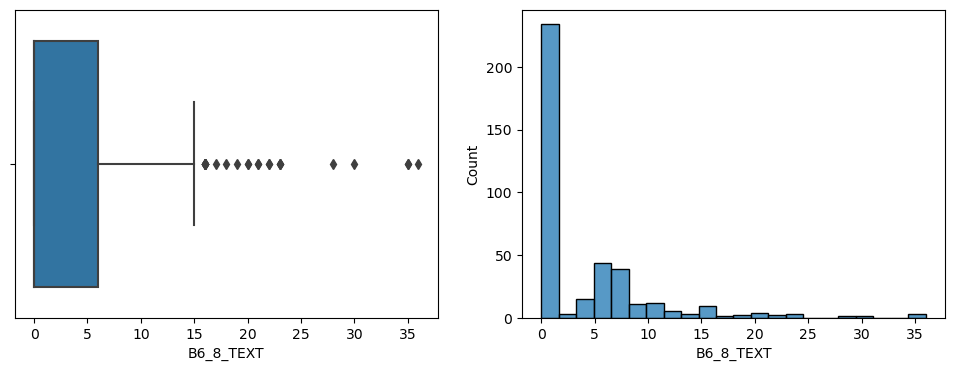

Production de manioc frais et transformation en attiéké et placali                                                                                                                                                                                                                                                           0.020067
Production de manioc frais                                                                                                                                                                                                                                                                                                   0.016722
production de manioc frais                                                                                                                                                                                                                                                                                                   0.013378
Production de manioc f

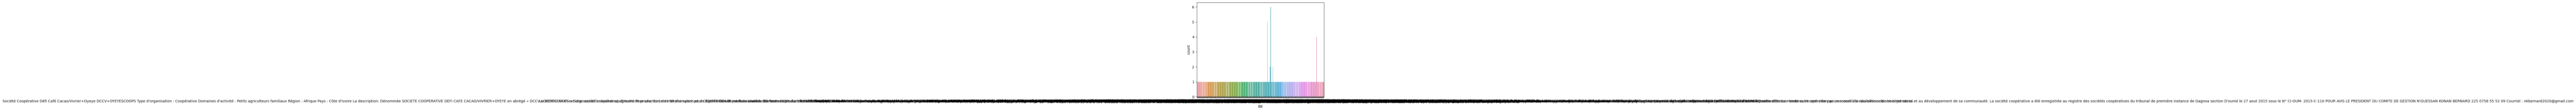

Other, specify    0.535826
Abidjan           0.292835
Bouaké            0.071651
Yamoussoukro      0.049844
Daloa             0.021807
Divo              0.012461
Agnibilékrou      0.006231
Arrah             0.006231
Guiglo            0.003115
Name: B9, dtype: float64


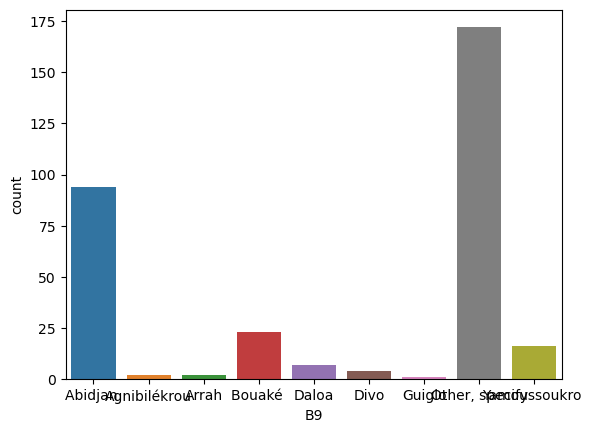

No     0.9
Yes    0.1
Name: B10, dtype: float64


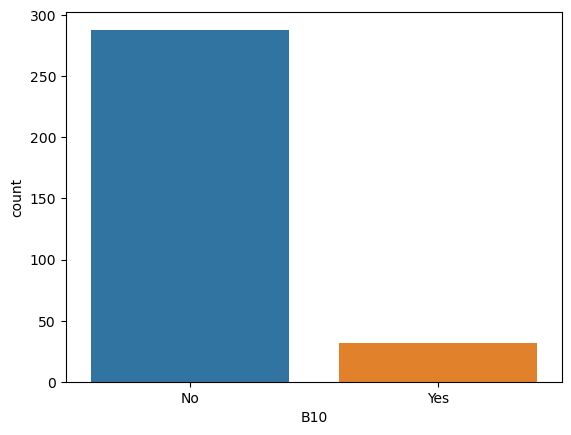

No              0.916933
Yes, specify    0.083067
Name: B11, dtype: float64


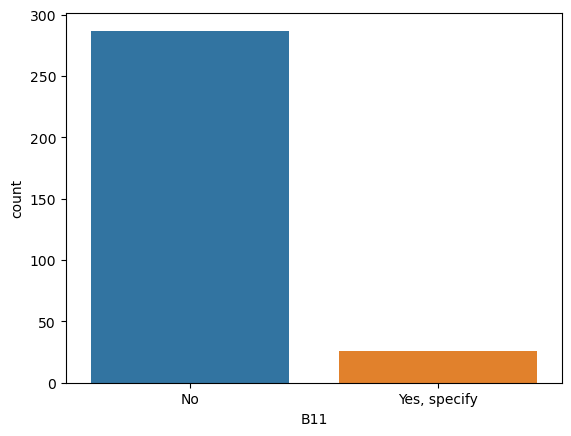

Local Markets                                             0.559006
Local Markets ,Regional Markets                           0.248447
Local Markets ,Regional Markets ,International Markets    0.086957
Regional Markets                                          0.046584
International Markets                                     0.027950
Local Markets ,International Markets                      0.024845
Regional Markets ,International Markets                   0.006211
Name: B12, dtype: float64


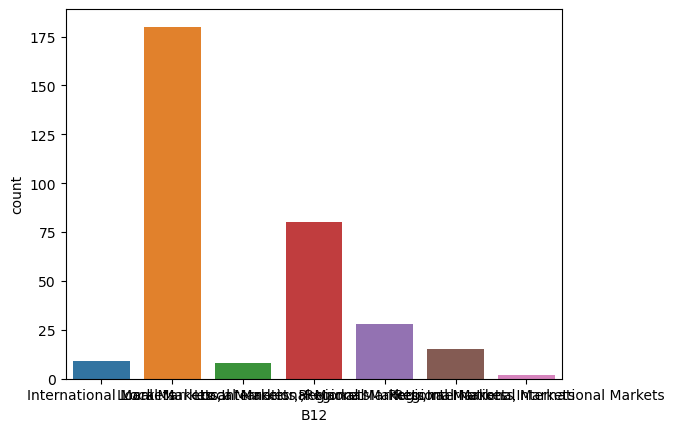

Between 1 and 5 millions        0.356923
Less than 1 million             0.353846
Between 5 and 25 millions       0.150769
Between 25 and 50 millions      0.058462
Between 50 and 100 millions     0.040000
More than 250 millions          0.021538
Between 100 and 250 millions    0.018462
Name: B13, dtype: float64


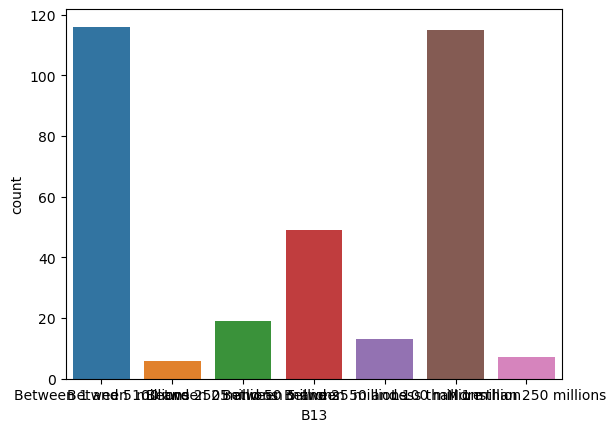

Cassava           0.80625
Other, specify    0.19375
Name: B14, dtype: float64


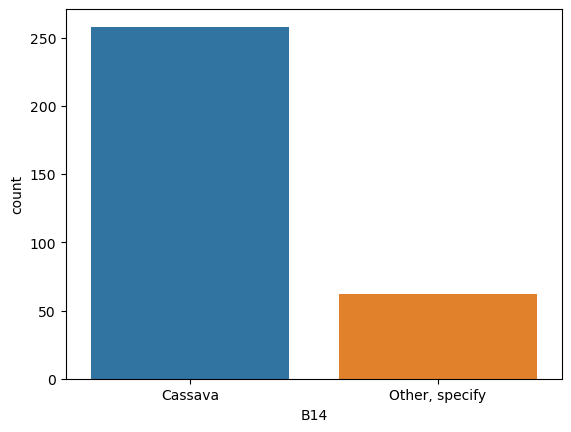

Yes, specify    0.694969
No              0.305031
Name: B15, dtype: float64


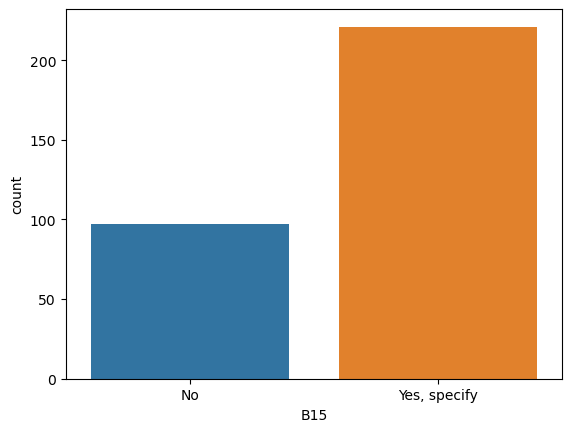

présidente               0.277966
directrice               0.155932
président                0.111864
directeur                0.094915
responsable              0.084746
presidente               0.061017
membre                   0.027119
secrétaire               0.020339
gérant                   0.016949
president                0.013559
gerant                   0.010169
gerante                  0.006780
fondateur                0.006780
encadreur                0.006780
coordinateur             0.006780
trésorière               0.006780
representante            0.003390
représentante            0.003390
secretaire               0.003390
superviseur              0.003390
propriétaire             0.003390
proprietaire             0.003390
vicepresidente           0.003390
producteurs              0.003390
presodente               0.003390
achat                    0.003390
manager                  0.003390
point                    0.003390
patron                   0.003390
membres       

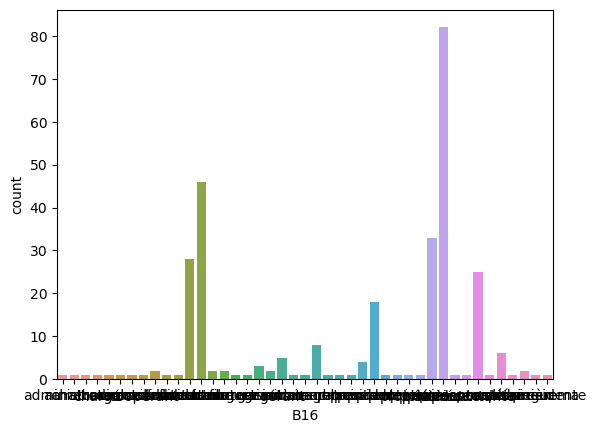

Oui    0.810559
Non    0.189441
Name: B17, dtype: float64


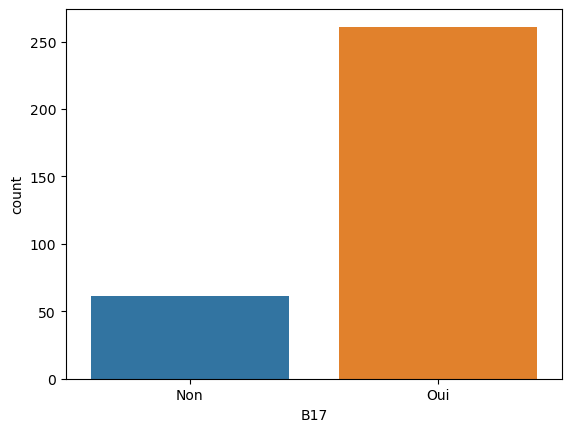

Societe Cooperative                  0.470833
SARL                                 0.145833
Association                          0.062500
Entreprise individuelle              0.025000
Entreprise individuelle              0.012500
                                       ...   
FEMMES BATANTTES                     0.004167
Faîtière (plusieurs Associations)    0.004167
GBANDEGOH                            0.004167
ABELEM                               0.004167
zran noué                            0.004167
Name: B17_1_TEXT, Length: 69, dtype: float64


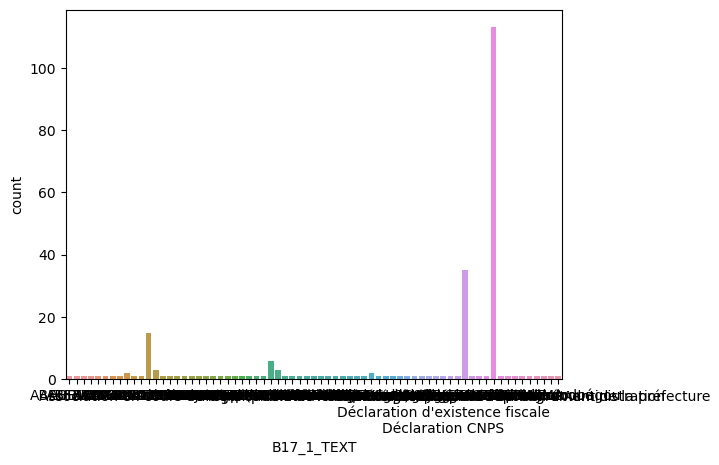

Statuts et règlements intérieurs                                                                    0.402477
Registre de commerce                                                                                0.256966
Aucun document                                                                                      0.142415
Déclaration fiscale d'existence DFE                                                                 0.080495
Autres                                                                                              0.046440
Statuts et règlements intérieurs,Déclaration fiscale d'existence DFE,Registre de commerce           0.037152
Déclaration fiscale d'existence DFE,Registre de commerce,Aucun document                             0.009288
Statuts et règlements intérieurs,Registre de commerce                                               0.009288
Déclaration fiscale d'existence DFE,Registre de commerce                                            0.006192
Statuts et règlemen

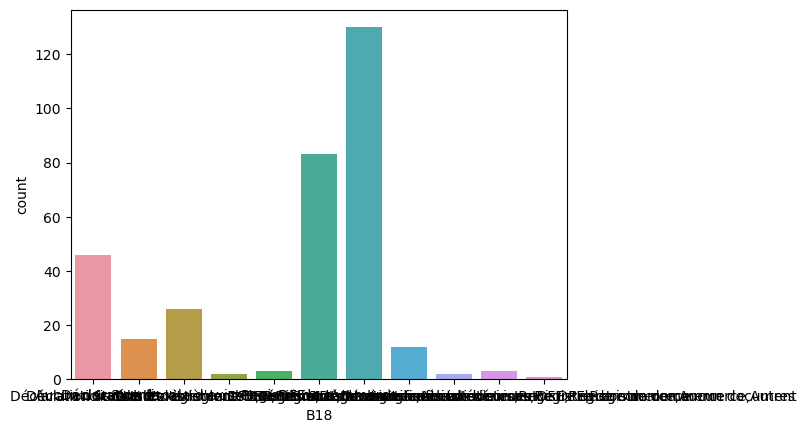

No     0.871287
Yes    0.128713
Name: C4, dtype: float64


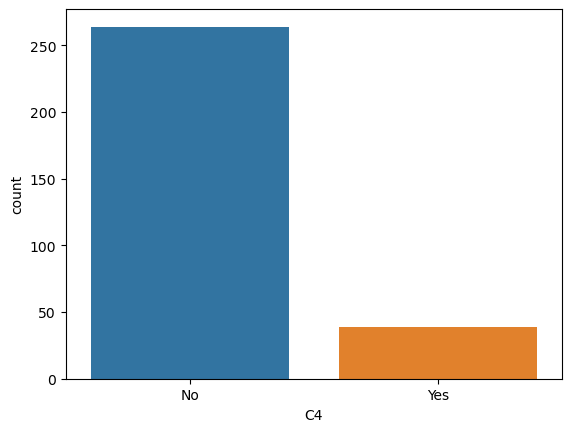

Between 5 and 25 millions       0.339869
Between 1 and 5 millions        0.326797
Between 25 and 50 millions      0.111111
Between 50 and 100 millions     0.101307
Less than 1 million             0.062092
Between 100 and 250 millions    0.042484
More than 250 millions          0.016340
Name: D3, dtype: float64


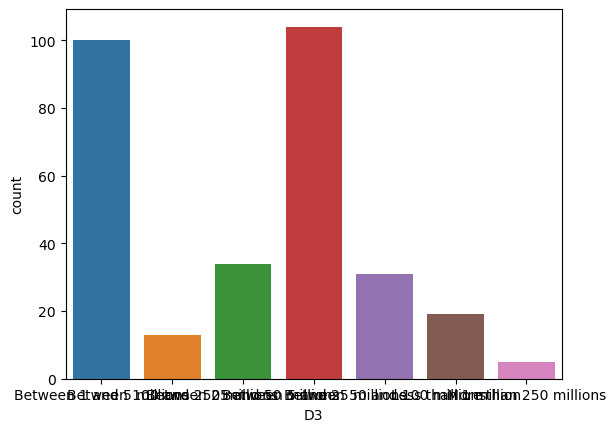

Between one and 3 years        0.439344
More than 3 years              0.203279
Between 1 and 3 months         0.150820
Between 3 months and a year    0.098361
Less than a month              0.055738
More than 8 years              0.052459
Name: D5, dtype: float64


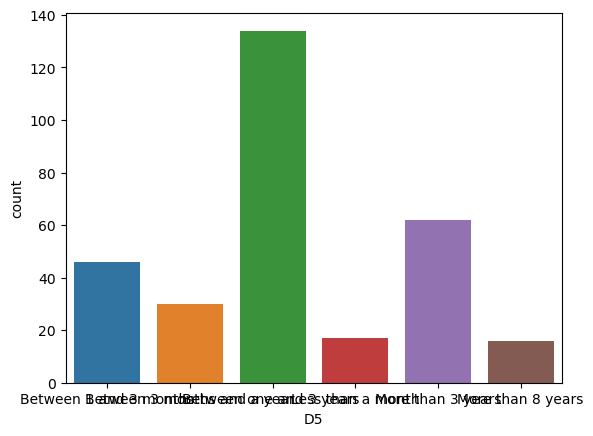

Every trimester    0.343137
Every year         0.323529
Every semester     0.199346
Every month        0.133987
Name: D6, dtype: float64


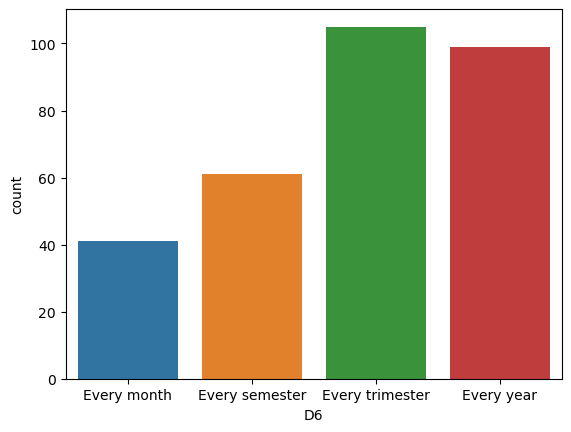

Logistics    0.424837
Charges      0.264706
Labor        0.143791
Inputs       0.120915
Other        0.032680
Taxes        0.013072
Name: D7, dtype: float64


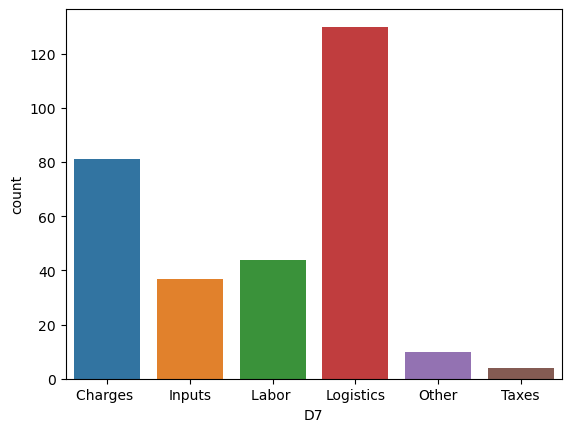

No     0.911765
Yes    0.088235
Name: D8, dtype: float64


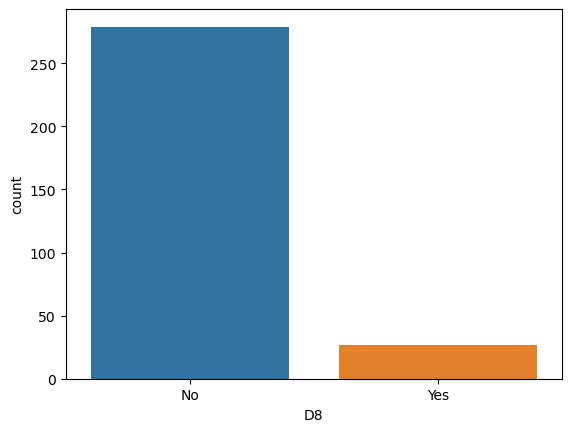

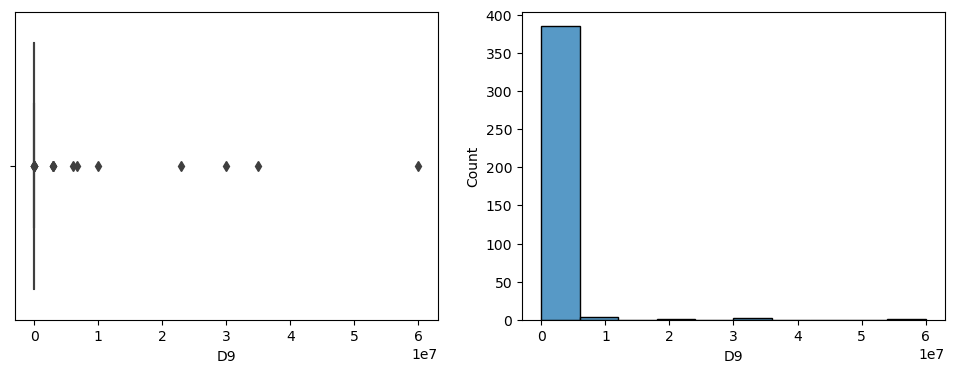

Yes    0.710963
No     0.289037
Name: D12, dtype: float64


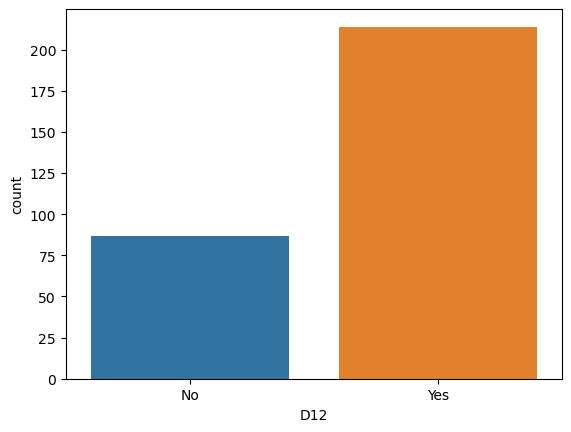

COOPEC                                    0.399038
Other : specify                           0.163462
BAOBAB                                    0.048077
Société générale (SGBCI)                  0.043269
ADVANS                                    0.038462
GTBank                                    0.038462
SIB                                       0.033654
Cofina                                    0.033654
Fin’Elle                                  0.028846
Bank of Africa                            0.028846
BNI Banque Nationale d’Investissement     0.028846
Ecobank                                   0.019231
Coris Bank                                0.019231
NSIA Bank                                 0.019231
ORABANK                                   0.019231
BICICI                                    0.019231
BSIC                                      0.004808
Standard Chartered                        0.004808
UBA                                       0.004808
VERSUS Bank                    

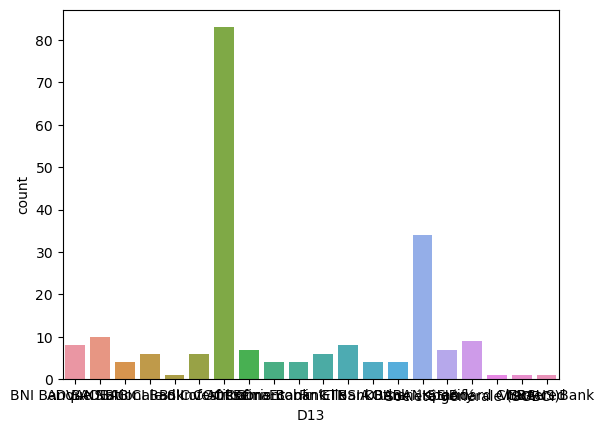

Detractor    0.459184
Passive      0.380952
Promoter     0.159864
Name: D14_NPS_GROUP, dtype: float64


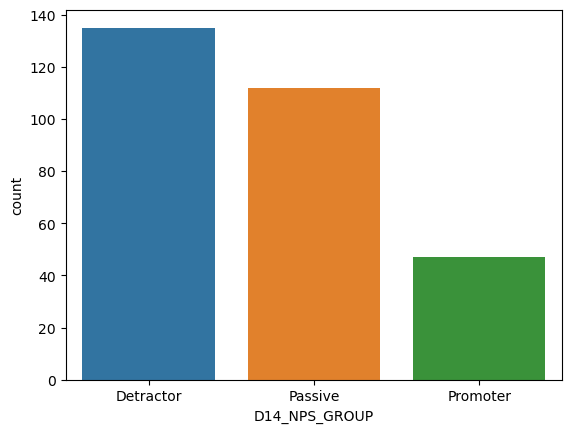

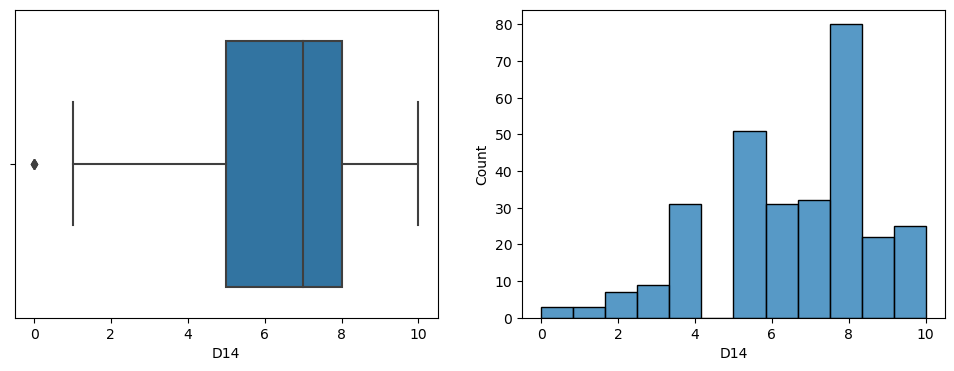

Yes for personal and business expenditures    0.641196
Yes for personal expenditures                 0.289037
No                                            0.039867
Yes for business expenditures                 0.029900
Name: E1, dtype: float64


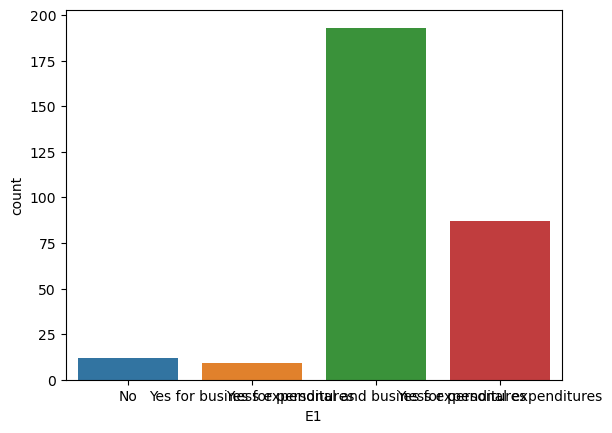

Daily             0.561224
Weekly            0.214286
Monthly           0.197279
Once in a year    0.027211
Name: E2, dtype: float64


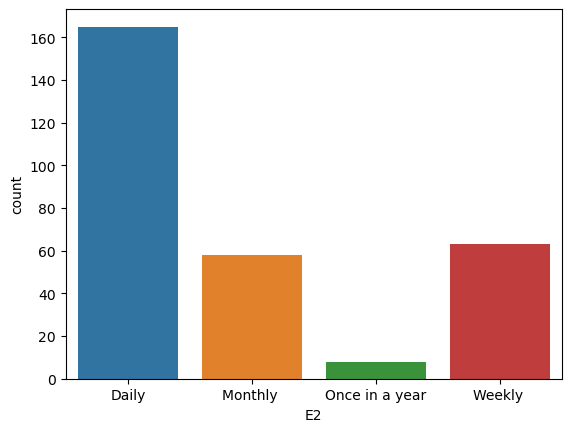

Passive      0.501730
Detractor    0.256055
Promoter     0.242215
Name: E4_NPS_GROUP, dtype: float64


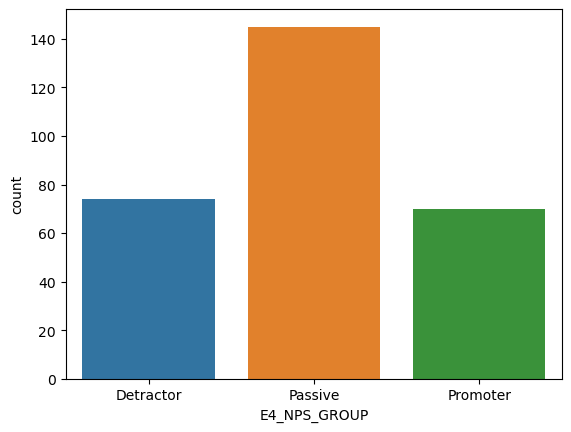

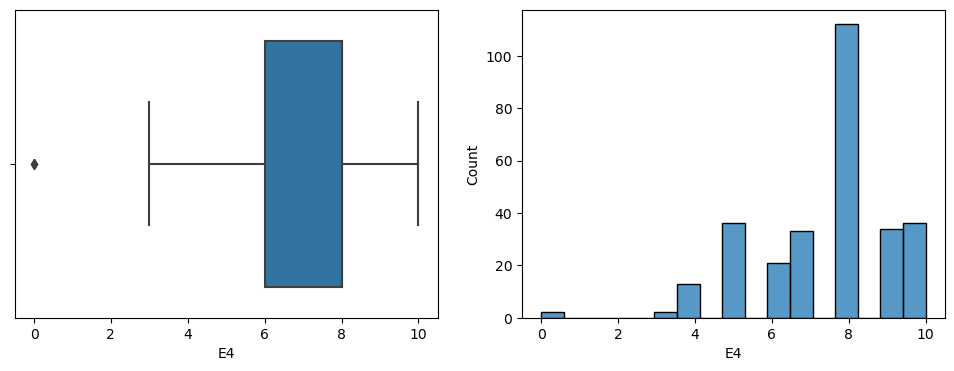

Technical partnerships, Access to markets, Access to new buyers    0.852843
Technical assistance, Coaching, Mentoring                          0.147157
Name: E7, dtype: float64


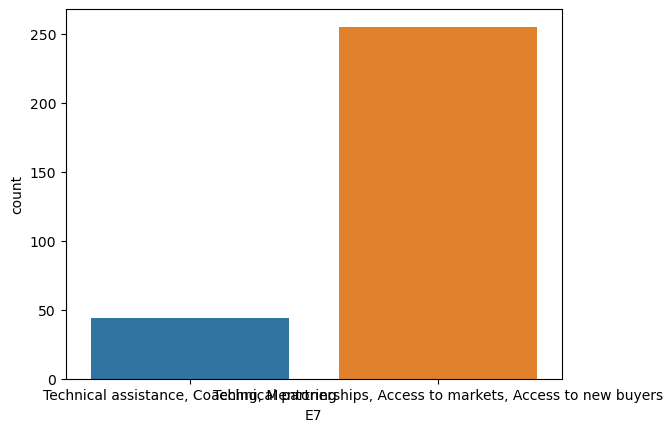

Comment bien rembourser son crédit                                           0.279461
Epargne et bancarisation agricole                                            0.235690
La vente en ligne pour optimiser ses revenus                                 0.212121
Connaitre son cycle d’activité agricole pour un crédit au moment opportun    0.175084
Constitution d’un dossier agricole                                           0.097643
Name: E8, dtype: float64


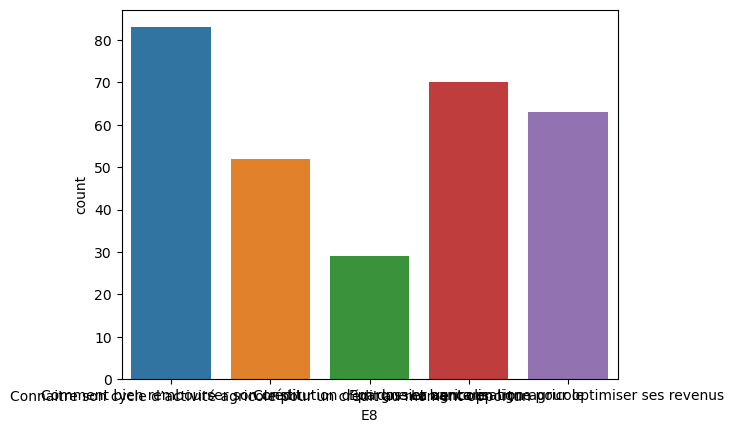

Yes    0.531773
No     0.468227
Name: E9, dtype: float64


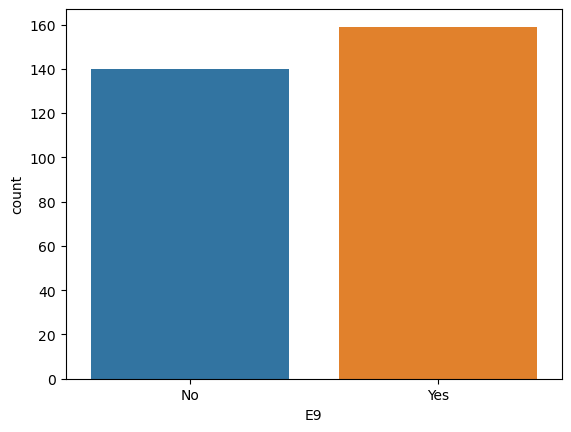

Yes    0.681661
No     0.318339
Name: F1, dtype: float64


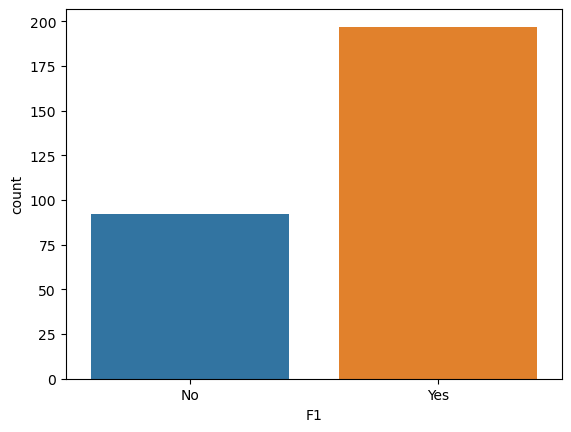

More than 90%    0.295775
<10%             0.147887
81-90%           0.126761
10-20%           0.084507
31-40%           0.070423
51-60%           0.070423
61-70%           0.059859
71-80%           0.052817
21-30%           0.045775
41-50%           0.045775
Name: F2, dtype: float64


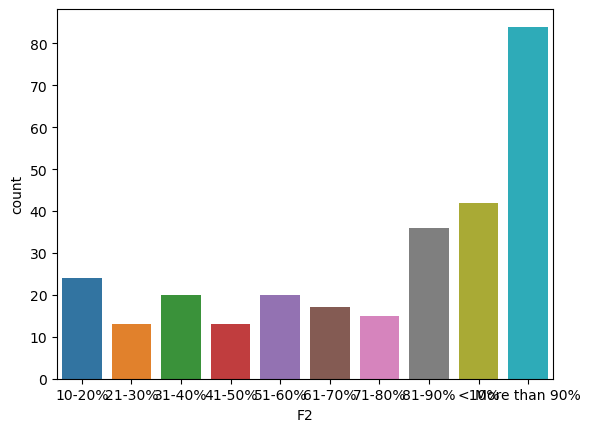

More than 90%    0.288732
81-90%           0.133803
71-80%           0.098592
Less than 10%    0.098592
21-30%           0.073944
10-20%           0.070423
51-60%           0.070423
41-50%           0.059859
61-70%           0.059859
31-40%           0.045775
Name: F3, dtype: float64


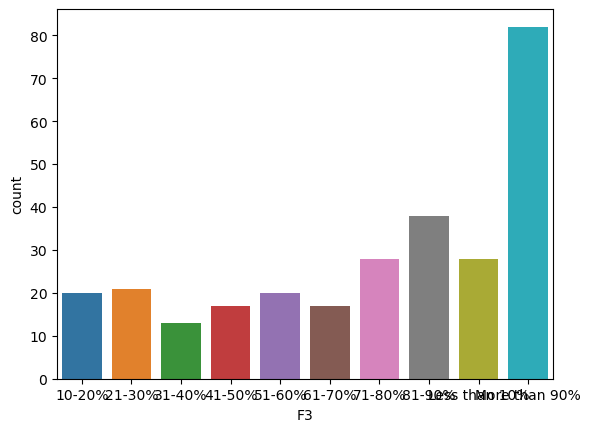

No     0.646853
Yes    0.353147
Name: F4, dtype: float64


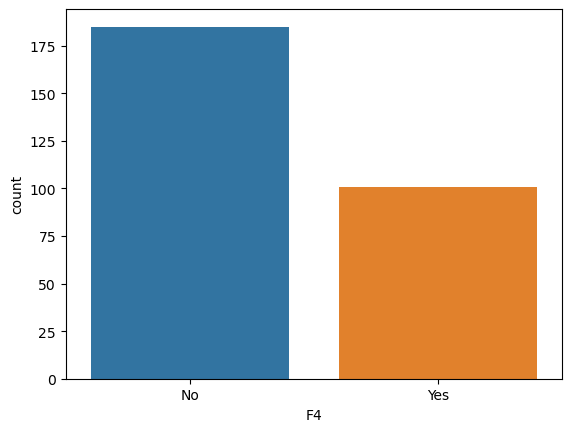

More than 90%    0.263345
81-90%           0.135231
51-60%           0.099644
71-80%           0.085409
Less than 10%    0.081851
10-20%           0.074733
21-30%           0.074733
61-70%           0.067616
31-40%           0.060498
41-50%           0.056940
Name: F5, dtype: float64


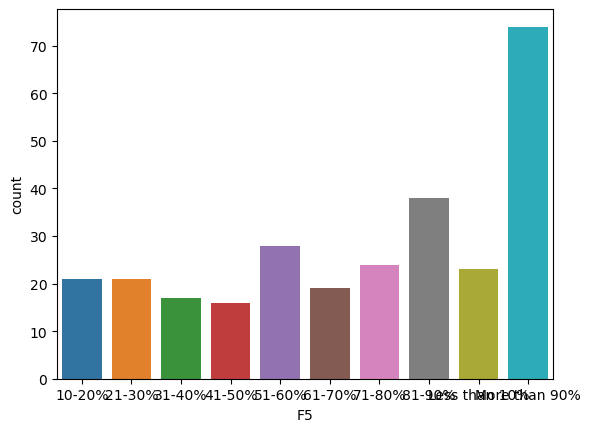

No              0.514184
Yes, explain    0.485816
Name: F6, dtype: float64


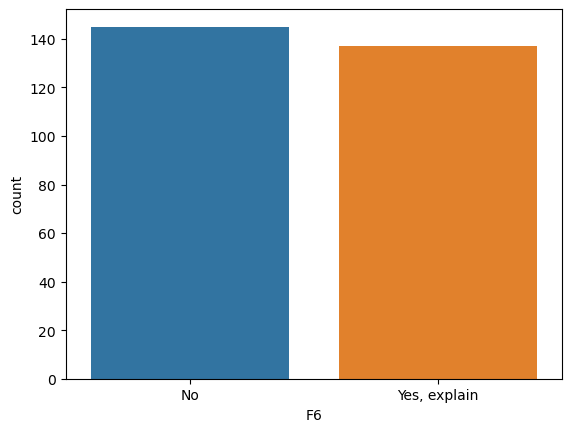

Yes, explain    0.978947
No              0.021053
Name: F7, dtype: float64


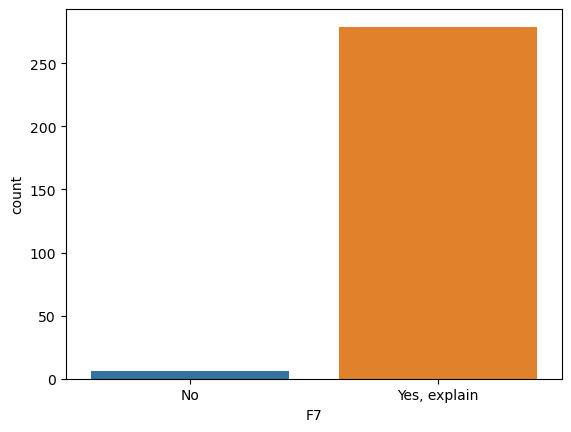

Yes, explain    0.770318
No              0.229682
Name: F8, dtype: float64


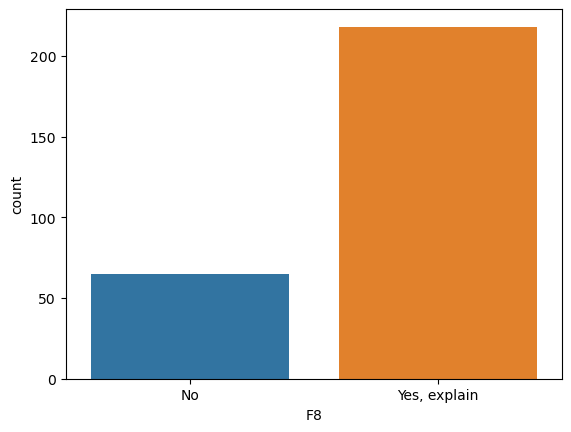

0    0.635204
1    0.364796
Name: Agri - Transport (financing for vehicle), dtype: float64


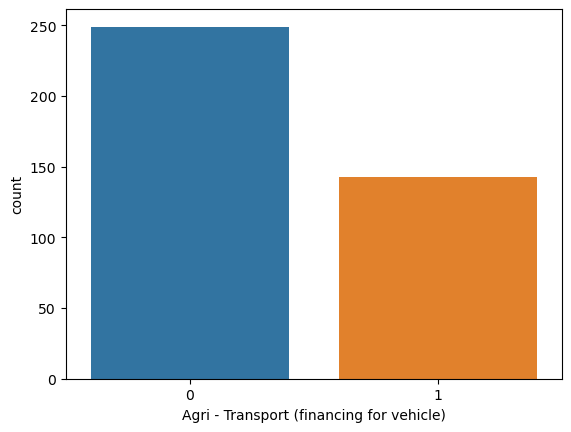

0    0.885204
1    0.114796
Name: Insurance, dtype: float64


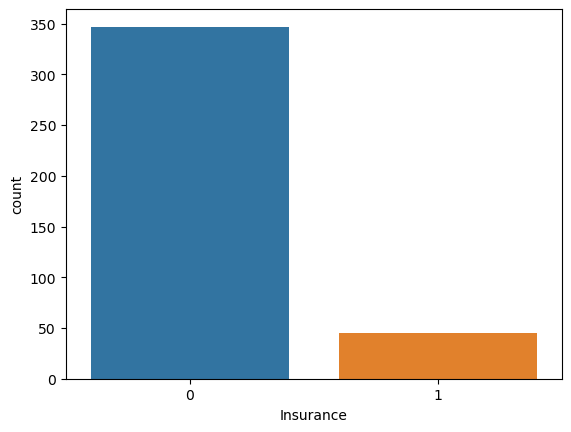

0    0.607143
1    0.392857
Name: Agri - Equipment (financing for equipment), dtype: float64


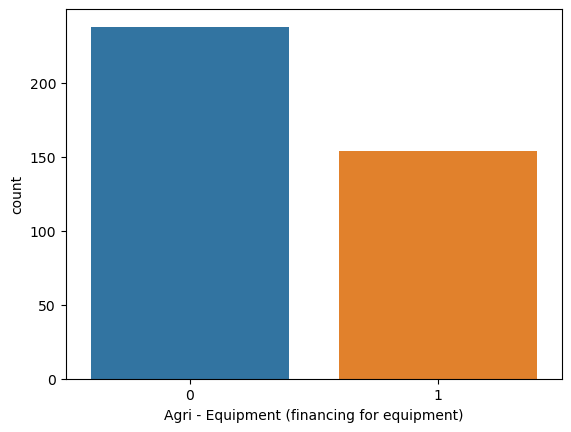

0    0.808673
1    0.191327
Name: Product financing (fertilizers, seeds, pesticides), dtype: float64


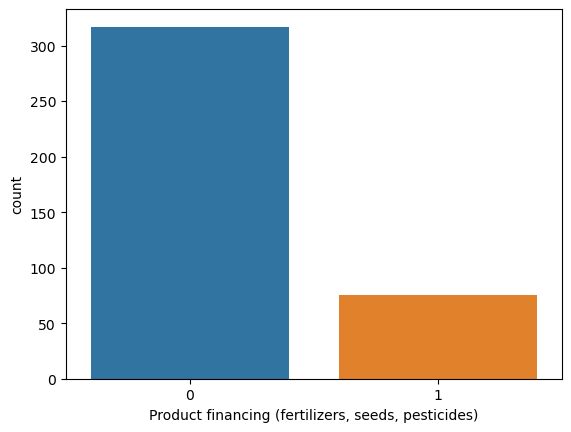

0    0.992347
1    0.007653
Name: No need for financial support, dtype: float64


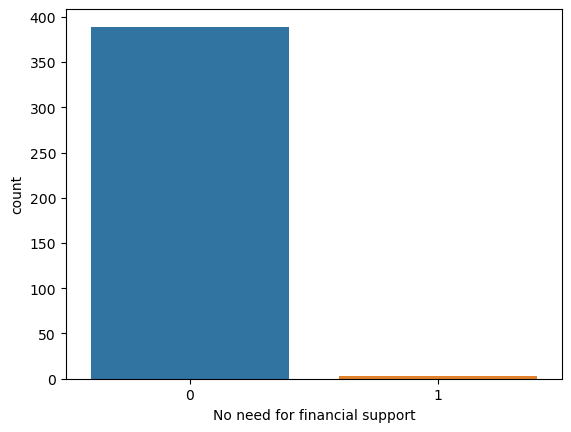

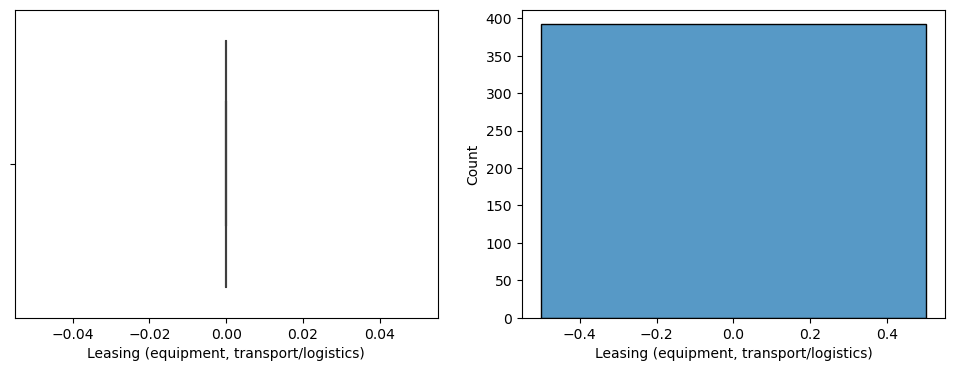

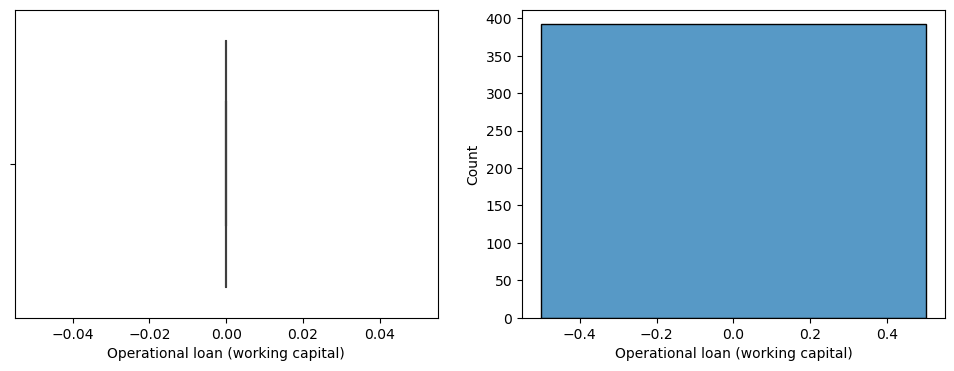

0    0.619898
1    0.380102
Name: Agri Cash (liquidities), dtype: float64


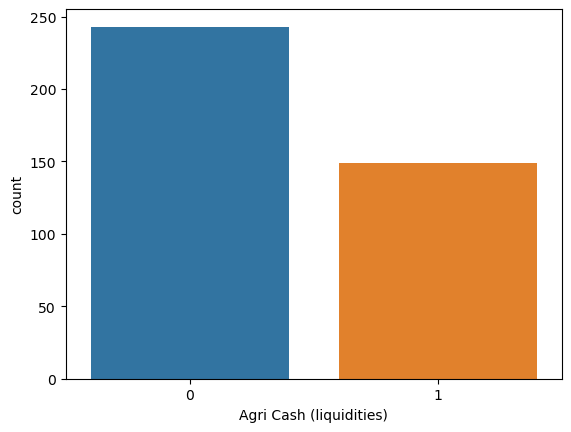

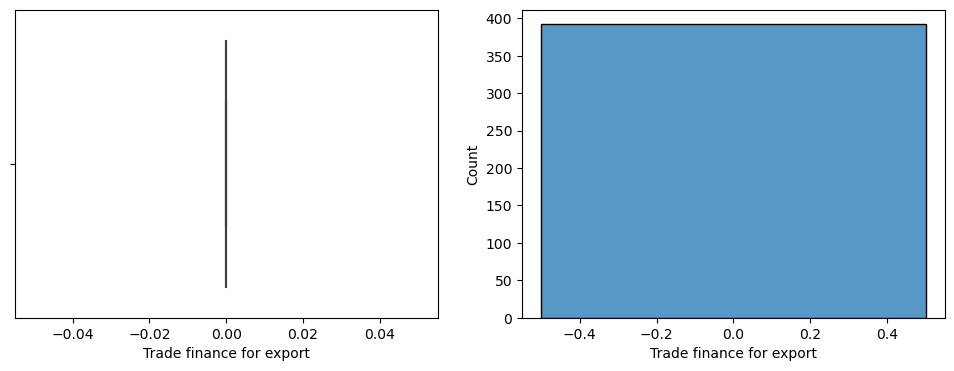

0    0.635204
1    0.364796
Name: March, dtype: float64


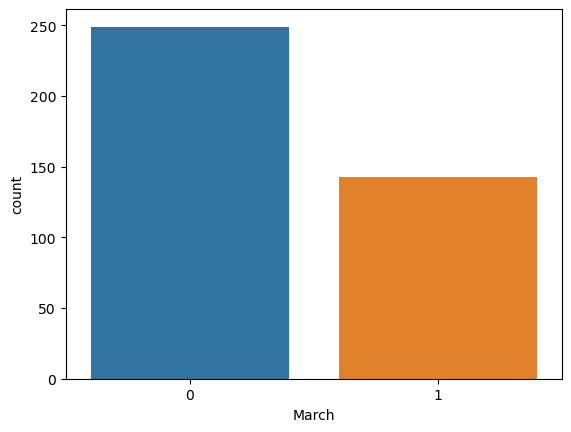

0    0.872449
1    0.127551
Name: May, dtype: float64


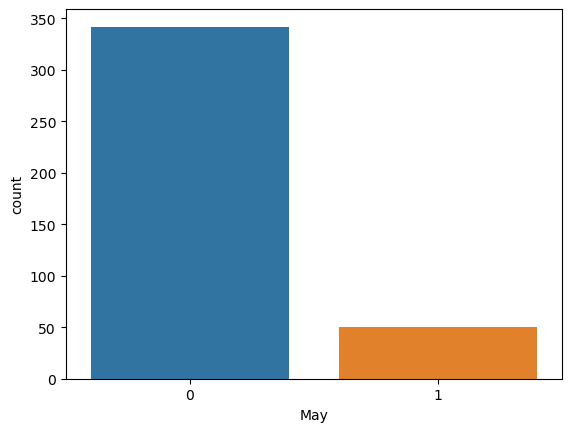

0    0.670918
1    0.329082
Name: February, dtype: float64


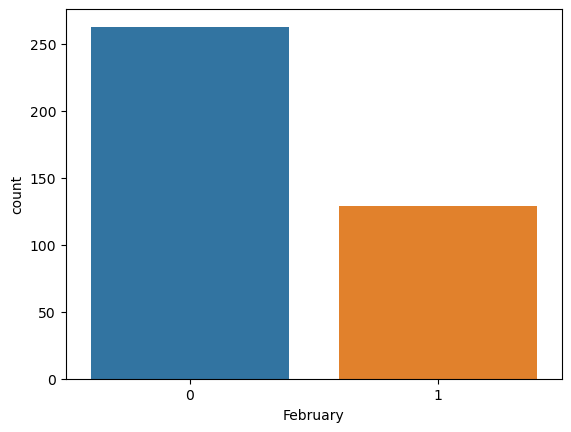

0    0.834184
1    0.165816
Name: April, dtype: float64


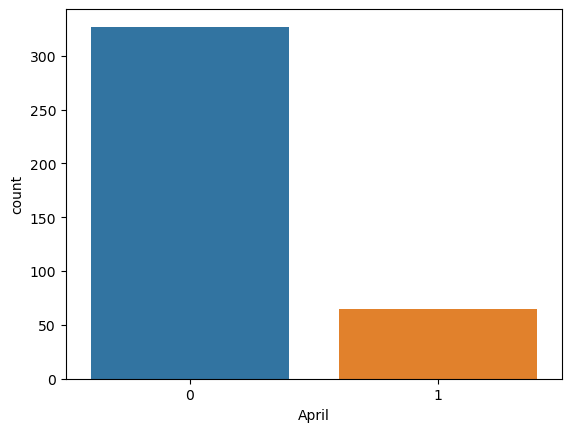

0    0.897959
1    0.102041
Name: September, dtype: float64


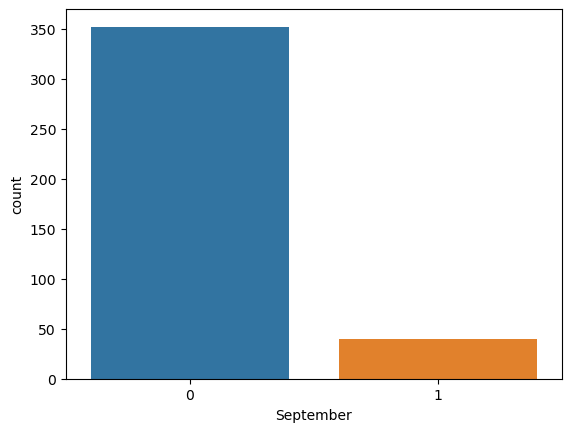

0    0.867347
1    0.132653
Name: June, dtype: float64


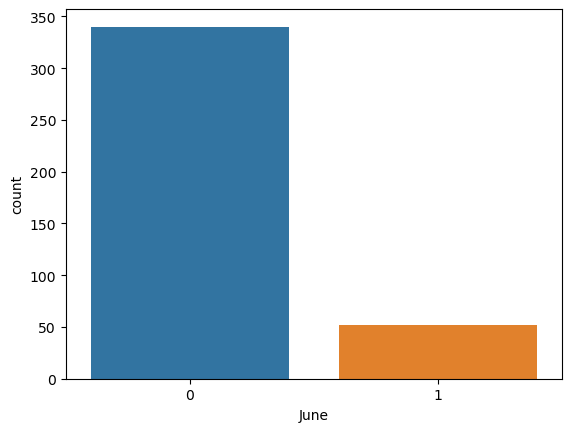

0    0.897959
1    0.102041
Name: August, dtype: float64


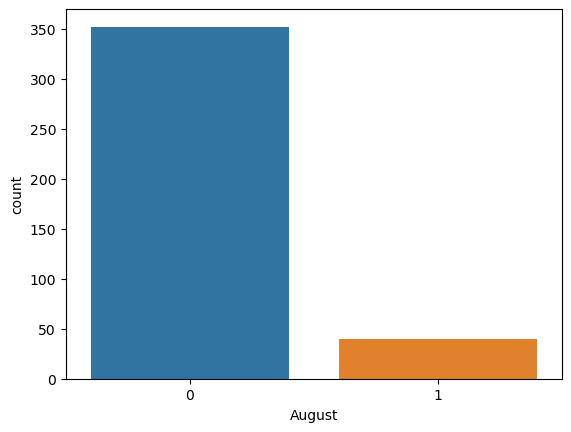

0    0.918367
1    0.081633
Name: November, dtype: float64


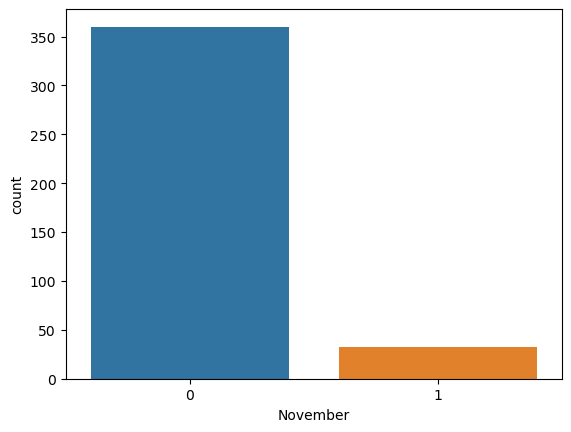

0    0.783163
1    0.216837
Name: January, dtype: float64


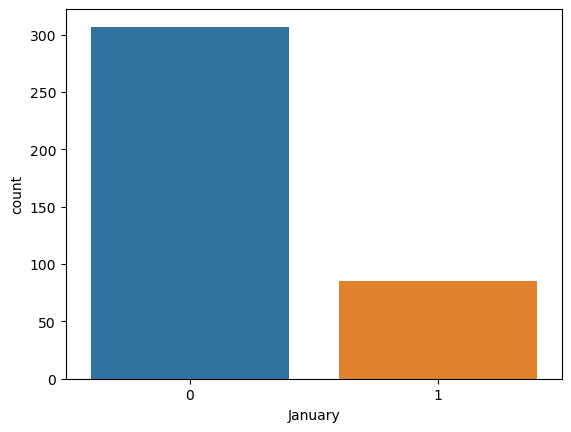

0    0.913265
1    0.086735
Name: December, dtype: float64


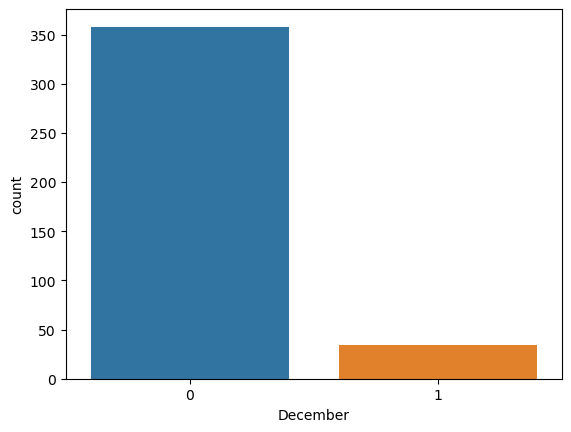

0    0.887755
1    0.112245
Name: July, dtype: float64


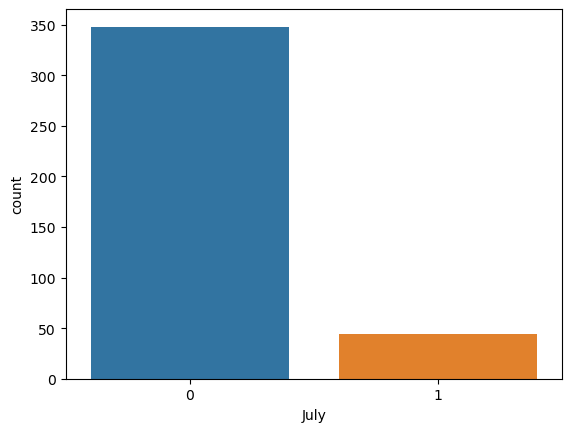

0    0.903061
1    0.096939
Name: October, dtype: float64


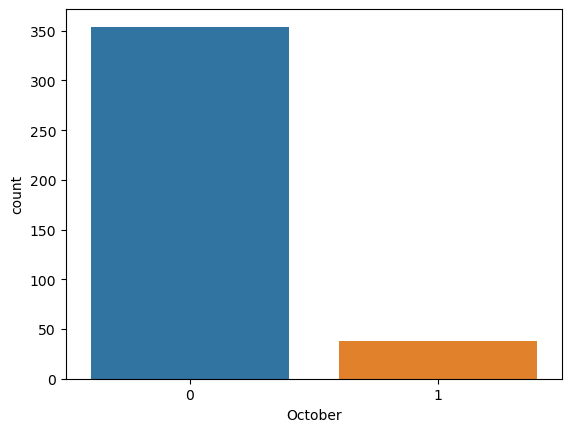

0    0.821429
1    0.178571
Name: Pay employees, dtype: float64


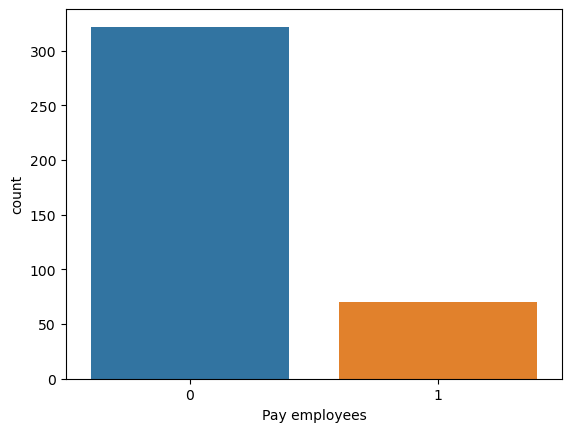

0    0.594388
1    0.405612
Name: Pay bills, dtype: float64


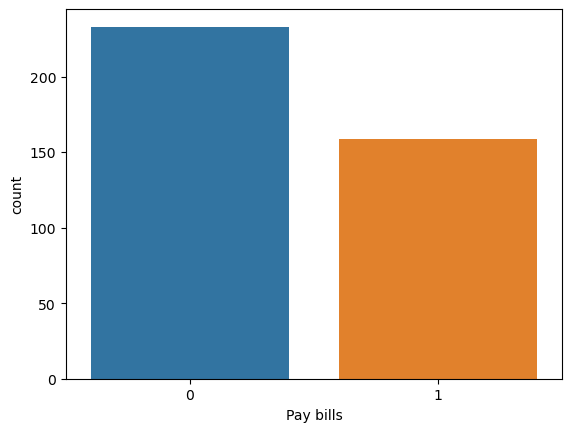

0    0.857143
1    0.142857
Name: Other :, dtype: float64


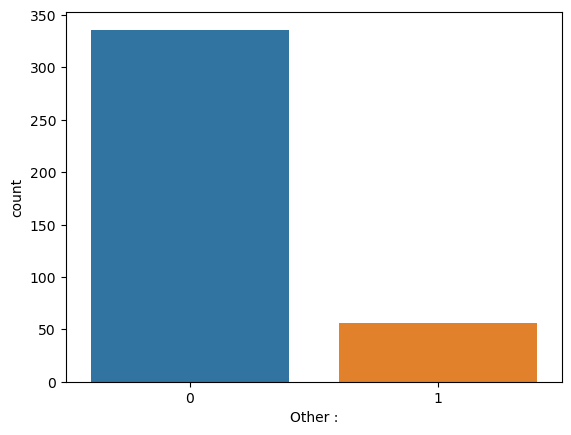

1    0.602041
0    0.397959
Name: Transfer money, dtype: float64


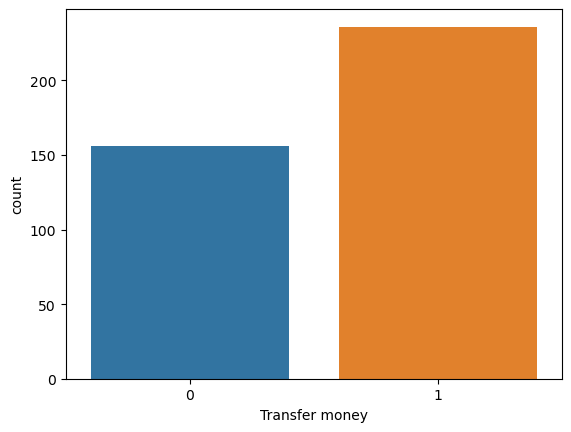

0    0.790816
1    0.209184
Name: Pay business suppliers, dtype: float64


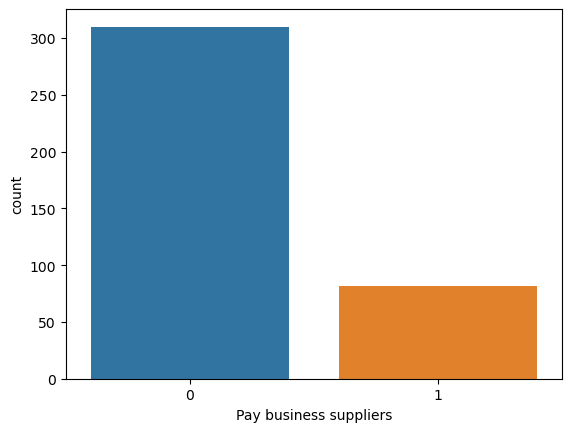

0    0.744898
1    0.255102
Name: Pay producers/ farmers, dtype: float64


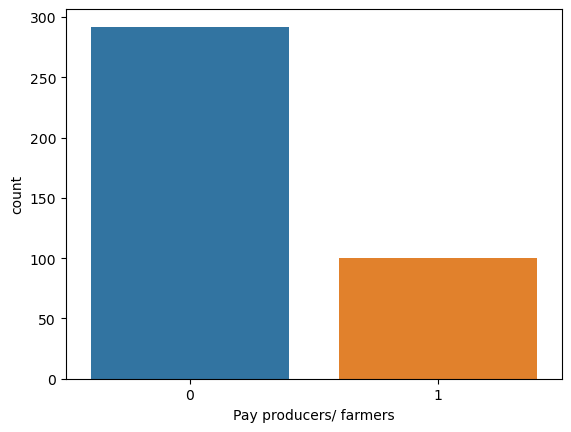

0    0.839286
1    0.160714
Name: Distribution, dtype: float64


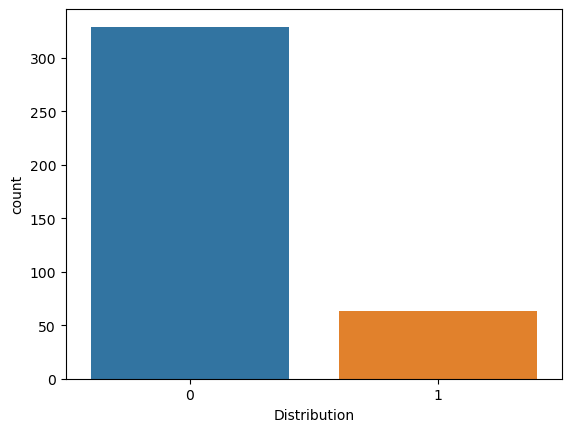

0    0.982143
1    0.017857
Name: Logistics/ Transport, dtype: float64


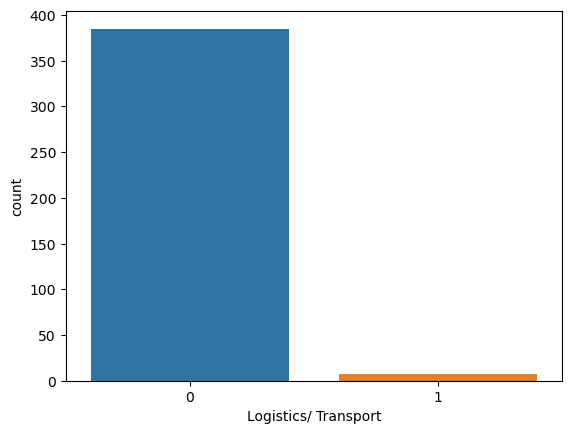

1    0.645408
0    0.354592
Name: Production, dtype: float64


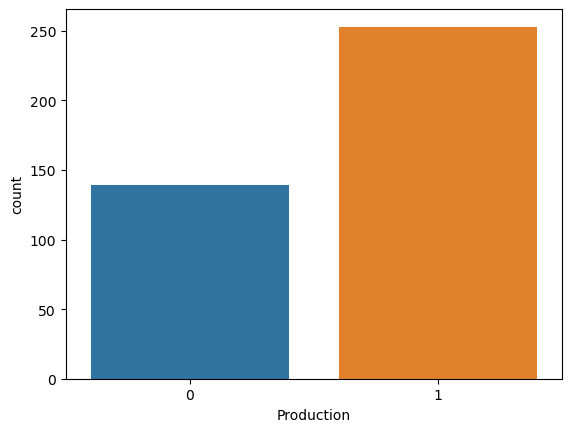

0    0.887755
1    0.112245
Name: Aggregation (group buying for reselling), dtype: float64


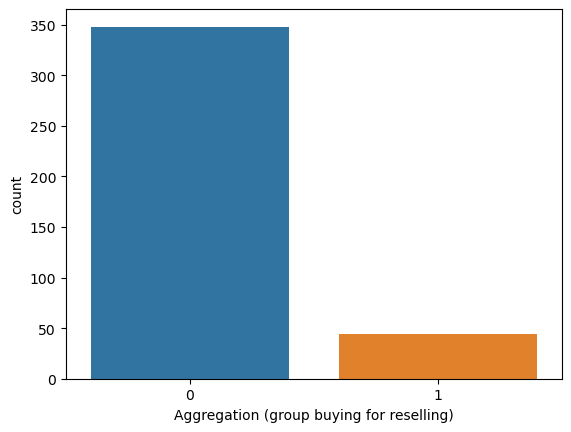

0    0.510204
1    0.489796
Name: Processing, dtype: float64


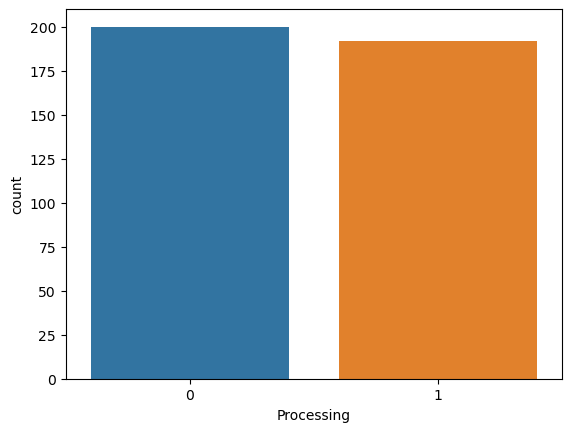

0    0.918367
1    0.081633
Name: Agri-Services - Inputs supply, dtype: float64


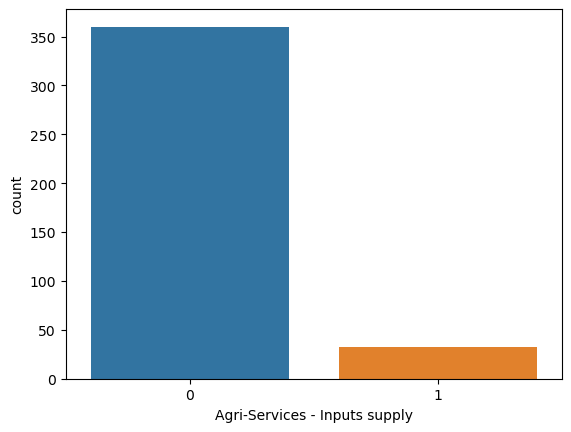

In [ ]:
def plot_num(feature):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(x=feature, data=df, ax=ax[0])
    sns.histplot(x=feature, data=df, ax=ax[1])
    plt.show()

def plot_cat(feature):
    sns.countplot(x=feature, data=df)
    print(df[feature].value_counts(normalize=True))
    plt.show()

for col in df.columns:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        plot_num(col)
    elif df[col].dtype == "object" or df[col].dtype == "category":
        plot_cat(col)

# Detect outliers using z-score for numerical features
z_scores = np.abs(stats.zscore(df.select_dtypes(include=["float64", "int64"])))
threshold = 3 # You can change this value
outlier_rows, outlier_cols = np.where(z_scores > threshold)
print("Outlier rows:", outlier_rows)
print("Outlier columns:", outlier_cols)

for col in df.select_dtypes(include=["object", "category"]).columns:
    print(col)
    print(df[col].value_counts(normalize=True))



## Feature importance: MI Score

In [18]:
df_cleaned = df.dropna()

In [19]:
df_cleaned.shape

(73, 82)

In [20]:
df = df_cleaned

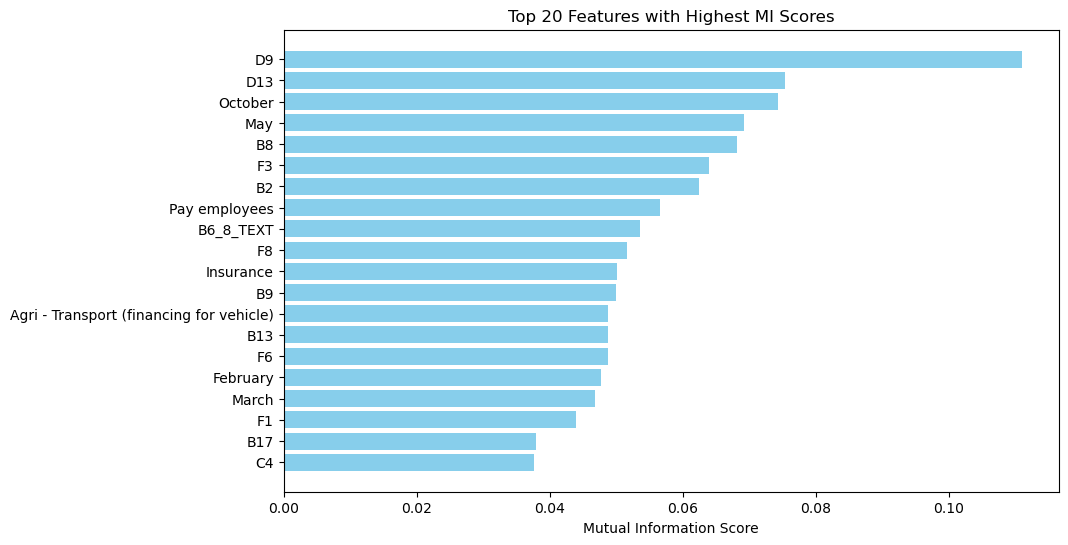

In [34]:
df_encoded = df.copy()  
label_encoder = LabelEncoder()

for column in df_encoded.select_dtypes(include=['category']):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
target_column = 'D8'
mi_scores = mutual_info_classif(df_encoded.drop(columns=[target_column]), df_encoded[target_column])

mi_df = pd.DataFrame({'Feature': df_encoded.columns.drop(target_column), 'MI Score': mi_scores})

mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Select the top 20 features
top_20_features = mi_df.head(20)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_20_features['Feature'], top_20_features['MI Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Top 20 Features with Highest MI Scores')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [36]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Get the indices of numerical columns
numerical_indices = [df.columns.get_loc(col) for col in numerical_columns]
numerical_indices

[4, 5, 7, 26, 30, 34, 51, 52, 54, 79, 80, 81]

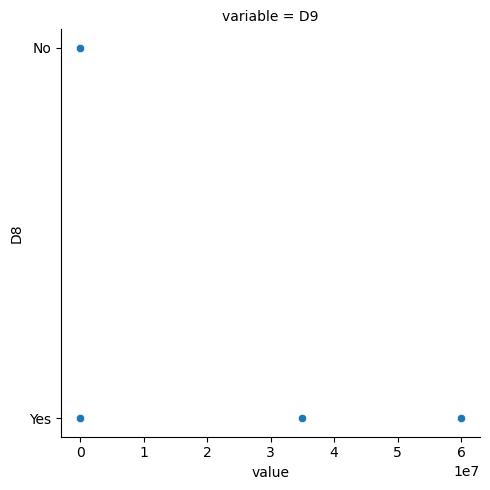

In [37]:
features = df.columns.tolist()
sns.relplot(
    x="value", y="D8", col="variable", data=df.melt(id_vars="D8", value_vars=features[26]), facet_kws=dict(sharex=False),
);